# Redes Complejas 

## Trabajo Práctico 1

In [5]:
# Imports

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('dark')

### `Stanford.adjlist`

In [4]:
stanford = nx.read_adjlist('datos_tp1/StanfordBerkeleyWeb.adjlist',comments='%')

Para hacer este análisis de escala, lo que tenemos que hacer es ir sampleando diferentes subgrafos, de tamaño variable e ir computando los tiempos del betweenness y la proximidad. 

In [14]:
import random
nodes = list(stanford.nodes)
random.shuffle(nodes)

In [41]:
connected_components = list(nx.connected_components(stanford))

connected_components.sort(key=len,reverse=True)

In [42]:
for component in connected_components[:20]:
    print(len(component))

654782
716
662
628
613
611
601
555
522
521
506
504
476
472
466
448
432
400
389
384


Vamos a calcular sobre las componentes conectadas que tienen entre 716 y 384 nodos

In [43]:
subgrafos = [stanford.subgraph(nodes) for nodes in connected_components[1:20]]

In [65]:
import time

times_betweenness = []
times_closeness = []

betweenness_data = []
closeness_data = []

for i,subgraph in enumerate(subgrafos):
    print("Tamaño de grafo:",len(subgrafos[i]),'nodos')
    print('Calculamos betweenness')
    start = time.time()
    foo = nx.betweenness_centrality(subgraph)
    end = time.time()
    print('Tiempo:',end-start)
    times_betweenness.append(end-start)
    betweenness_data.append(foo)
    
    print('Calculamos proximidad')
    start = time.time()
    foo = nx.closeness_centrality(subgraph)
    end = time.time()
    print('Tiempo:',end-start)
    times_closeness.append(end-start)
    closeness_data.append(foo)
    
print('Listo\n')

Tamaño de grafo: 716 nodos
Calculamos betweenness
Tiempo: 3.3454039096832275
Calculamos proximidad
Tiempo: 2.53115177154541
Tamaño de grafo: 662 nodos
Calculamos betweenness
Tiempo: 3.7390804290771484
Calculamos proximidad
Tiempo: 0.6302189826965332
Tamaño de grafo: 628 nodos
Calculamos betweenness
Tiempo: 2.460629463195801
Calculamos proximidad
Tiempo: 1.986119270324707
Tamaño de grafo: 613 nodos
Calculamos betweenness
Tiempo: 2.630418300628662
Calculamos proximidad
Tiempo: 0.3678474426269531
Tamaño de grafo: 611 nodos
Calculamos betweenness
Tiempo: 2.339646339416504
Calculamos proximidad
Tiempo: 1.8794894218444824
Tamaño de grafo: 601 nodos
Calculamos betweenness
Tiempo: 2.2806754112243652
Calculamos proximidad
Tiempo: 1.75762939453125
Tamaño de grafo: 555 nodos
Calculamos betweenness
Tiempo: 2.097334623336792
Calculamos proximidad
Tiempo: 1.5326213836669922
Tamaño de grafo: 522 nodos
Calculamos betweenness
Tiempo: 1.9668056964874268
Calculamos proximidad
Tiempo: 0.28023290634155273


In [45]:
# Salvamos datos para no correr todo de nuevo
import pickle
with open('stanford_data/betw_data.data','wb') as open_file:
    pickle.dump(betweenness_data,open_file)
with open('stanford_data/betw_times.data','wb') as open_file:
    pickle.dump(times_betweenness,open_file)
with open('stanford_data/clos_data.data','wb') as open_file:    
    pickle.dump(closeness_data,open_file)
with open('stanford_data/clos_times.data','wb') as open_file:
    pickle.dump(times_closeness,open_file)

Vamos a ajustar sobre los datos de tiempos leyes de potencia tipo

$$ t(N) = t_0 N^\gamma$$

siendo $t$ el tiempo requerido para calcular, y $N$ el tamaño del subgrafo (medido en cantidad de nodos). Los parámetros de ajuste son la constante de proporcionalidad $t_0$ y el exponente $\gamma$.

In [66]:
size_subgrafos = [len(subgrafo) for subgrafo in subgrafos]

In [67]:
# Intentemos ajustar una ley de potencia sobre estos datos

def power_law(X,a,gamma):
    return a *(X**gamma)

from scipy.optimize import curve_fit

p0_btw,pcov_btw = curve_fit(power_law,size_subgrafos,times_betweenness)
p0_clo,pcov_clo = curve_fit(power_law,size_subgrafos,times_closeness)

In [57]:
X = np.linspace(350,716,10000)

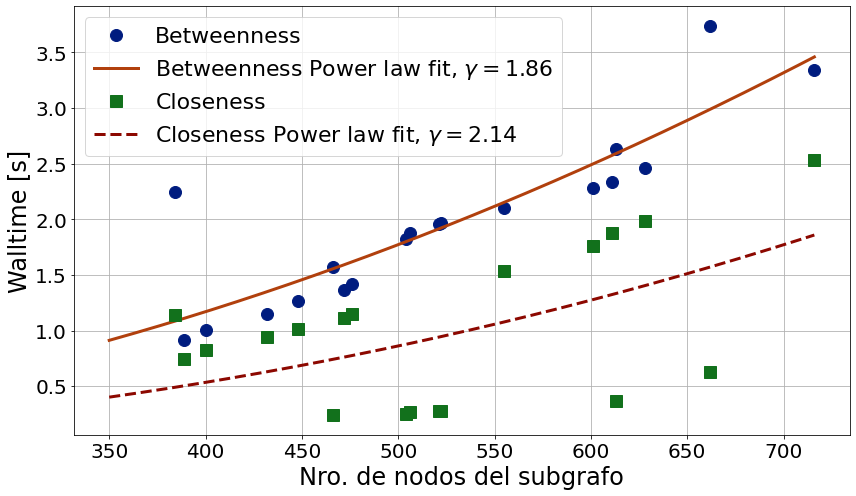

In [70]:
plt.figure(figsize=(12,7))

plt.plot(size_subgrafos,times_betweenness,'o',markersize=12,linewidth=2,label='Betweenness')
plt.plot(X,power_law(X,*p0_btw),linewidth=3,label='Betweenness Power law fit, $\\gamma=1.86$')

plt.plot(size_subgrafos,times_closeness,'s',markersize=12,linewidth=2,label='Closeness')
plt.plot(X,power_law(X,*p0_clo),'--',linewidth=3,label='Closeness Power law fit, $\\gamma=2.14$')

plt.xlabel('Nro. de nodos del subgrafo',size=24)
plt.ylabel('Walltime [s]',size=24)

plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=22)

plt.grid()

plt.tight_layout()

In [60]:
degree_data = [nx.degree(subgraph) for subgraph in subgrafos]

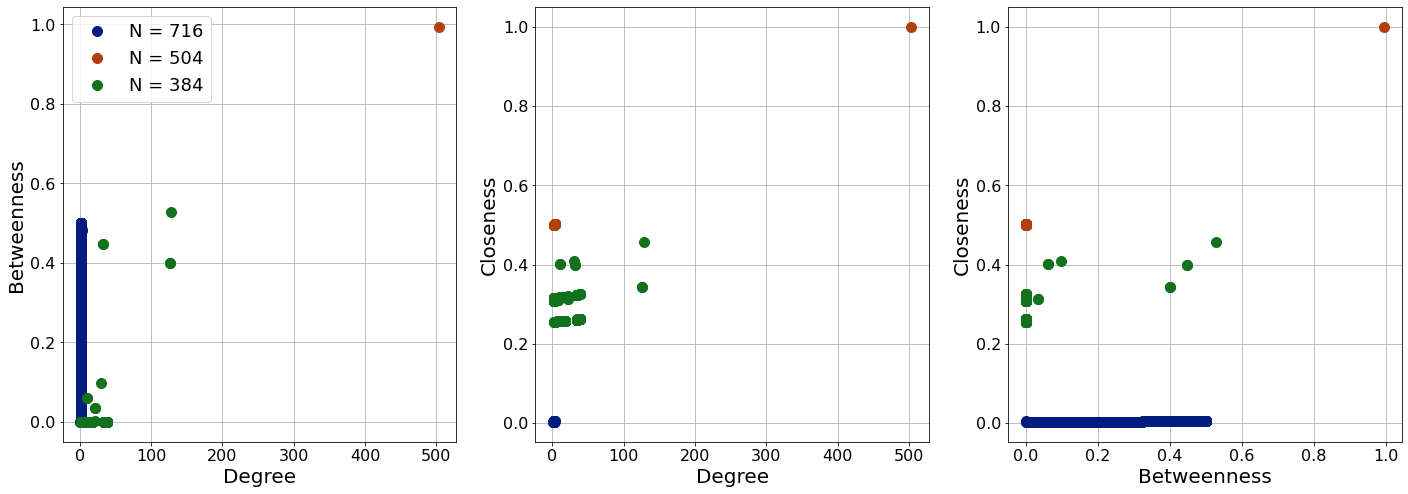

In [71]:
# Correlaciones

fig, axs = plt.subplots(1,3,figsize=(24,8))

idx = [0,10,-1]

for i in idx :   
    btw_list = list(betweenness_data[i].values())
    clo_list = list(closeness_data[i].values())
    degree_list = list(dict(degree_data[i]).values())
    
    axs[0].plot(degree_list,btw_list,'o',markersize=10,label=f'N = {size_subgrafos[i]}')
    axs[1].plot(degree_list,clo_list,'o',markersize=10)
    axs[2].plot(btw_list,clo_list,'o',markersize=10)
    
axs[0].set_xlabel('Degree',fontsize=20)
axs[1].set_xlabel('Degree',fontsize=20)
axs[2].set_xlabel('Betweenness',fontsize=20)

axs[0].set_ylabel('Betweenness',fontsize=20)
axs[1].set_ylabel('Closeness',fontsize=20)
axs[2].set_ylabel('Closeness',fontsize=20)

axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

axs[0].legend(fontsize=18)

axs[0].grid()
axs[1].grid()
axs[2].grid()

Text(0, 0.5, 'Relative freq.')

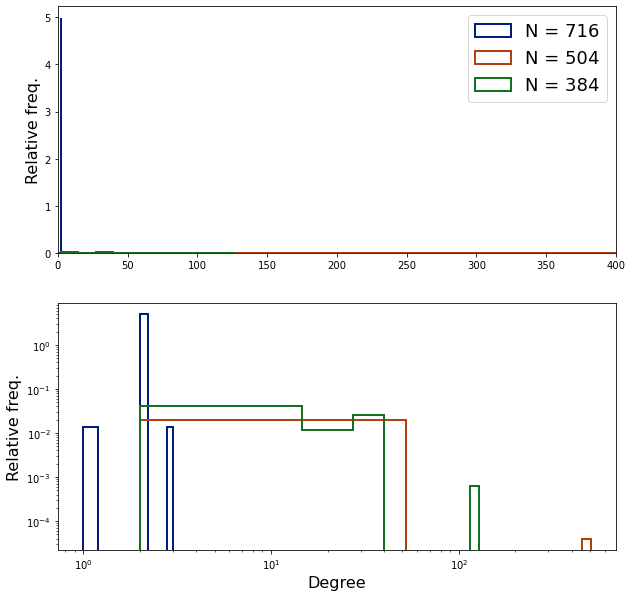

In [72]:
fig,axs = plt.subplots(2,1,figsize=(10,10))

idx = [0,10,-1]

for i in idx:
    degree_list = list(dict(degree_data[i]).values())
    
    axs[0].hist(degree_list,density=True,histtype='step',linewidth=2,label=f'N = {size_subgrafos[i]}')
    axs[1].hist(degree_list,density=True,histtype='step',linewidth=2)

axs[1].set_yscale('log')
axs[1].set_xscale('log')

axs[0].set_xlim([0,400])

axs[0].legend(fontsize=18)

axs[1].set_xlabel('Degree',fontsize=16)
axs[0].set_ylabel('Relative freq.',fontsize=16)
axs[1].set_ylabel('Relative freq.',fontsize=16)
    